<a href="https://www.kaggle.com/code/boldengakok/basic-eda-on-the-ucl-alltime-performance?scriptVersionId=183663061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The EDA provide insight into the performance of top teams in the UCL.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Step1: Load and explore the dataset

In [2]:
df = pd.read_csv('/kaggle/input/champions-league-dataset-1955-2023/UCL_AllTime_Performance_Table.csv')

In [3]:
df.head()

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern Munich,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


## Step2: Data Cleaning and Preprocessing
    1. The points columns is just a copy of the previous col, so I'll remove it along with first column
    2. The Goal difference columns seems to have inconsistance values -(maybe I'll try to recompute it and see if that gonna help) make values consistance.
    3. Columns names need to be renamed for clarity and also check for any missing values
    4. The goal column has two values in the same column that is the goal scored by a team and a goal score against the team we can consider splitting it into two column goal_scored, and goal_against.
   

In [4]:
#1. Remove the (#, Pt.) Col
df = df.drop(columns=['#', 'Pt.'])
df.head()

,Team,M.,W,D,L,goals,Dif
0,Real Madrid,486,291,85,110,1076:55:00,533
1,Bayern Munich,388,231,78,79,817:24:00,427
2,FC Barcelona,341,196,77,68,675:51:00,319
3,Manchester United,289,153,69,67,524:56:00,224
4,Juventus,297,151,68,78,472:57:00,171


In [5]:
#Rename columns
df = df.rename(columns={'M.':'Match_Played', 'W':'Wins',
                       'D':'Draw', 'L':'Losses', 'goals':'Goals', 
                        'Dif':'Goal_Difference' })
df.head()

,Team,Match_Played,Wins,Draw,Losses,Goals,Goal_Difference
0,Real Madrid,486,291,85,110,1076:55:00,533
1,Bayern Munich,388,231,78,79,817:24:00,427
2,FC Barcelona,341,196,77,68,675:51:00,319
3,Manchester United,289,153,69,67,524:56:00,224
4,Juventus,297,151,68,78,472:57:00,171


In [6]:
# Split the Goals col into Goals_Scored and Goals_Against
df[['Goals_Scored', 'Goals_Against', 'Temp']] = df['Goals'].str.split(':', expand=True)
df['Goals_Scored'] = df['Goals_Scored'].astype(int)
df['Goals_Against'] = df['Goals_Against'].astype(int)

#Dropping the original 'Goals' column
df.drop(columns=['Goals', 'Temp'], inplace=True)
df.head()

,Team,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored,Goals_Against
0,Real Madrid,486,291,85,110,533,1076,55
1,Bayern Munich,388,231,78,79,427,817,24
2,FC Barcelona,341,196,77,68,319,675,51
3,Manchester United,289,153,69,67,224,524,56
4,Juventus,297,151,68,78,171,472,57


In [7]:
# Recalculating the goal difference as the previous records were not accurate
df['Goal_Difference'] = df['Goals_Scored'] - df['Goals_Against']
df.head()

,Team,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored,Goals_Against
0,Real Madrid,486,291,85,110,1021,1076,55
1,Bayern Munich,388,231,78,79,793,817,24
2,FC Barcelona,341,196,77,68,624,675,51
3,Manchester United,289,153,69,67,468,524,56
4,Juventus,297,151,68,78,415,472,57


## Step3: Basic Statistical Analysis

In [8]:
df.describe()

,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored,Goals_Against
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,33.254237,13.039548,7.169492,13.039548,28.949153,48.878531,19.929379
std,61.581865,31.468472,13.729255,18.669137,106.089212,110.852194,15.115723
min,2.000000,0.000000,0.000000,0.000000,-48.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,2.000000,-8.000000,4.000000,7.000000
50%,8.000000,2.000000,2.000000,5.000000,-2.500000,10.000000,14.500000
75%,31.500000,9.000000,6.000000,14.000000,9.000000,41.500000,29.000000
max,486.000000,291.000000,85.000000,110.000000,1021.000000,1076.000000,59.000000


In [9]:
# Calculate the win, draw, loss rate
df['Win_Rate'] = df['Wins'] / df['Match_Played'] * 100
df['Draw_Rate'] = df['Draw'] / df['Match_Played'] * 100
df['Loss_Rate'] = df['Losses'] / df['Match_Played'] * 100
df.head()

,Team,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored,Goals_Against,Win_Rate,Draw_Rate,Loss_Rate
0,Real Madrid,486,291,85,110,1021,1076,55,59.876543,17.489712,22.633745
1,Bayern Munich,388,231,78,79,793,817,24,59.536082,20.103093,20.360825
2,FC Barcelona,341,196,77,68,624,675,51,57.478006,22.580645,19.941349
3,Manchester United,289,153,69,67,468,524,56,52.941176,23.875433,23.183391
4,Juventus,297,151,68,78,415,472,57,50.841751,22.895623,26.262626


## Step4: Visualizations
> I will be showing 10 teams in each plot for clarity purposes

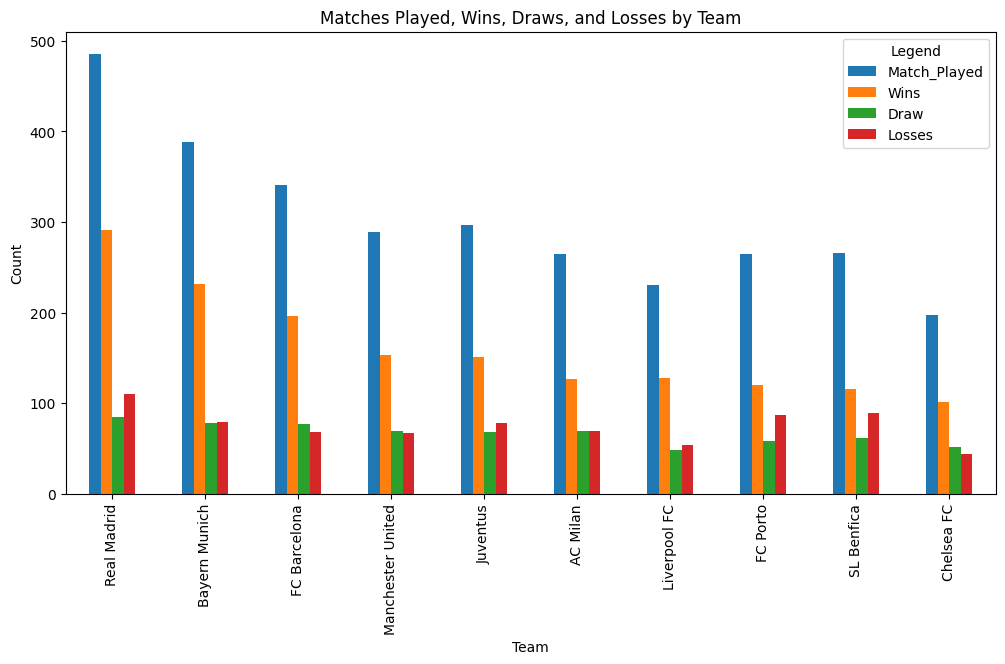

In [10]:
# Match played, wins, Draw, and Losses
df.set_index('Team')[['Match_Played', 'Wins', 'Draw', 'Losses']].head(10) \
.plot(kind='bar', figsize=(12,6))
plt.title('Matches Played, Wins, Draws, and Losses by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Legend')
plt.show()

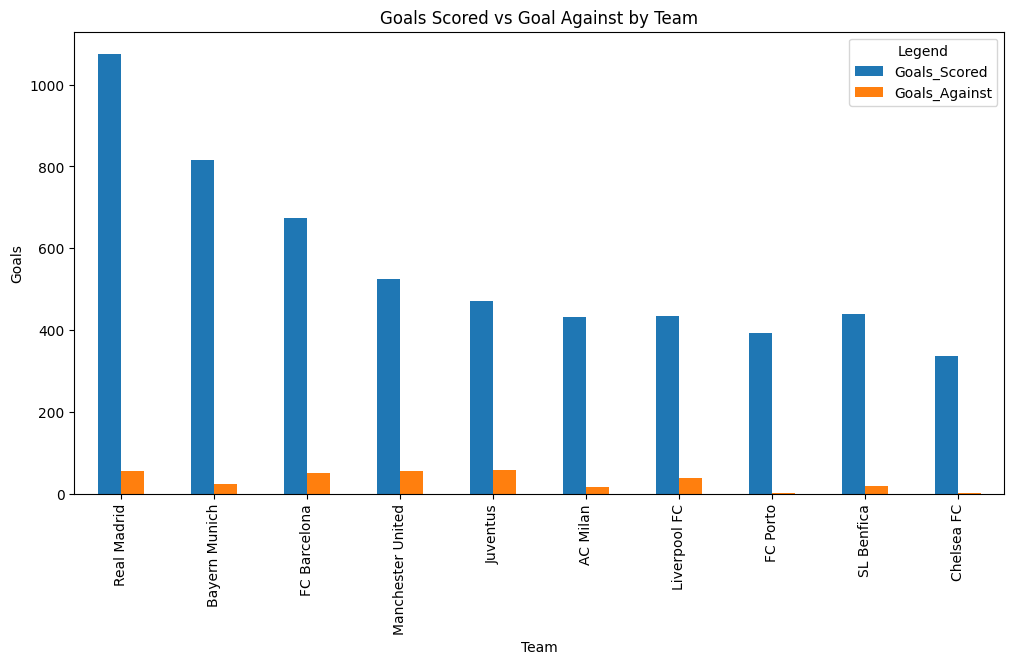

In [11]:
#Goal scored vs Goal Against by Team
df.set_index('Team')[['Goals_Scored', 'Goals_Against']].head(10) \
.plot(kind='bar', figsize=(12,6))
plt.title('Goals Scored vs Goal Against by Team')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.legend(title='Legend')
plt.show()


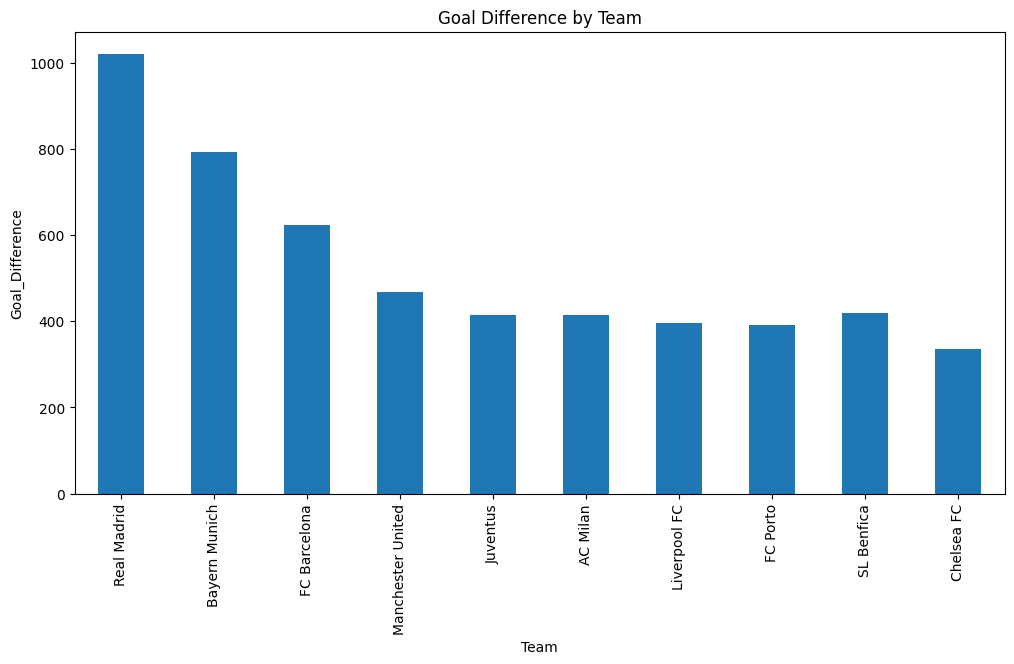

In [12]:
#Goal Difference
df.set_index('Team')['Goal_Difference'].head(10) \
.plot(kind='bar', figsize=(12,6))
plt.title('Goal Difference by Team')
plt.xlabel('Team')
plt.ylabel('Goal_Difference')
plt.show()


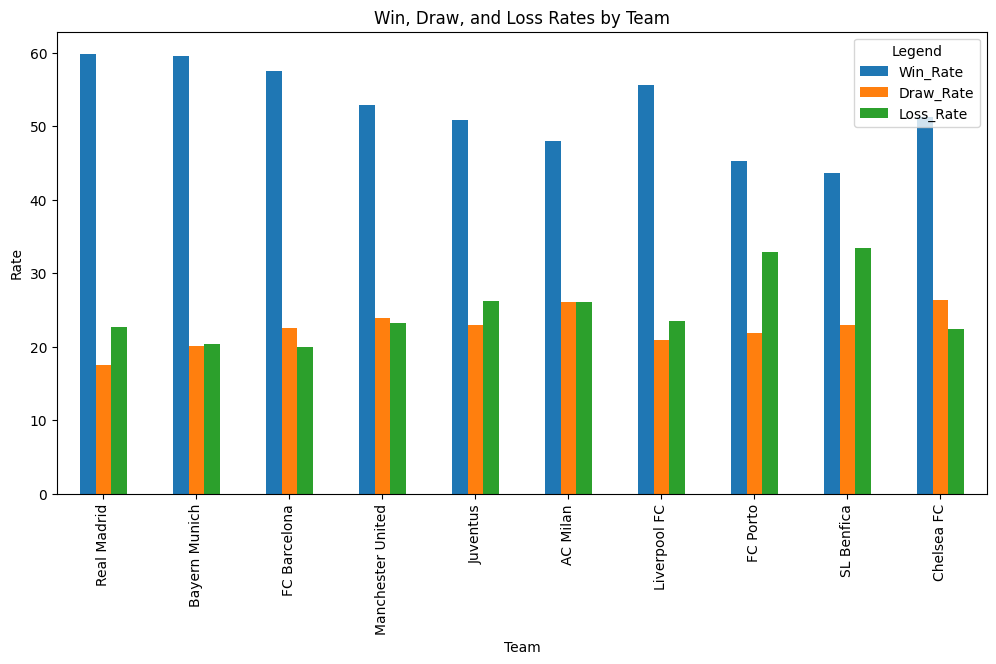

In [13]:
# Win, Draw, and Loss Rates
df.set_index('Team')[['Win_Rate', 'Draw_Rate', 'Loss_Rate']].head(10) \
.plot(kind='bar', figsize=(12,6))
plt.title('Win, Draw, and Loss Rates by Team')
plt.xlabel('Team')
plt.ylabel('Rate')
plt.legend(title='Legend')
plt.show()

In [14]:
df.head()

,Team,Match_Played,Wins,Draw,Losses,Goal_Difference,Goals_Scored,Goals_Against,Win_Rate,Draw_Rate,Loss_Rate
0,Real Madrid,486,291,85,110,1021,1076,55,59.876543,17.489712,22.633745
1,Bayern Munich,388,231,78,79,793,817,24,59.536082,20.103093,20.360825
2,FC Barcelona,341,196,77,68,624,675,51,57.478006,22.580645,19.941349
3,Manchester United,289,153,69,67,468,524,56,52.941176,23.875433,23.183391
4,Juventus,297,151,68,78,415,472,57,50.841751,22.895623,26.262626


# Aanalysis
* __Match Played and Performance:__ Read Madrid has played most matches and has the highest number of wins. This might indicate their dominance in the champions League.
* __Goal Analysis:__ Read Madrid also has the highest number of goals scored and a significant goal difference, further indicating their strong performance.
* __Rates Analysis:__ Real Madrid, Byern Munich, and Barcelona have the high win rates suggesting their consistent performance. Juventus has a relatively hight loss rate compared to other teams, indicating more challenges in their matches.